# HW4 - Analyzing Bias in Networks - DSCI 531 - Spring 2024|

### Please complete the code or analysis under “TODO”. 70pts in total. You should run every cell and keep all the outputs before submitting. Failing to include your outputs will result in zero points.

### Please keep in mind the academic integrity. Plagiarism will be taken seriously.

## Reading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from collections import Counter


chicago_mat = loadmat('Data/UChicago.mat')
chicago_adj = chicago_mat['A']
chicago_info = chicago_mat['local_info']


caltech_mat = loadmat('Data/Caltech.mat')
caltech_adj = caltech_mat['A']
caltech_info = caltech_mat['local_info']

print("Chicago graph")
print(f"number of nodes={chicago_adj.shape[0]}")
print(f"number of edges={int(np.sum(chicago_adj)//2)}")
print()

chicago_gender = np.zeros(chicago_adj.shape[0], dtype=int)
chicago_gender[chicago_info[:, 1] == 1] = 1
chicago_gender[chicago_info[:, 1] == 2] = 2
print(f"Genders: \n\t#0 = {len(chicago_gender[chicago_gender == 0])} \n\t#1 = {len(chicago_gender[chicago_gender == 1])} \n\t#2 = {len(chicago_gender[chicago_gender == 2])}")
print()


print("Caltech graph: ")
print(f"number of nodes={caltech_adj.shape[0]}")
print(f"number of edges={int(np.sum(caltech_adj)//2)}")
print()


caltech_gender = np.zeros(caltech_adj.shape[0], dtype=int)
caltech_gender[caltech_info[:, 1] == 1] = 1
caltech_gender[caltech_info[:, 1] == 2] = 2

print("")
print("caltech genders: \n\t#0 = {} \n\t#1 = {} \n\t#2 = {}".format(len(caltech_gender[caltech_gender == 0]), len(caltech_gender[caltech_gender == 1]), len(caltech_gender[caltech_gender == 2])))

Chicago graph
number of nodes=6591
number of edges=208103

Genders: 
	#0 = 673 
	#1 = 2875 
	#2 = 3043

Caltech graph: 
number of nodes=769
number of edges=16656


caltech genders: 
	#0 = 66 
	#1 = 228 
	#2 = 475


## Analysis of Centrality
### Compute Centrality Scores for Caltech and Chicago, and compare them.

<Figure size 640x480 with 0 Axes>

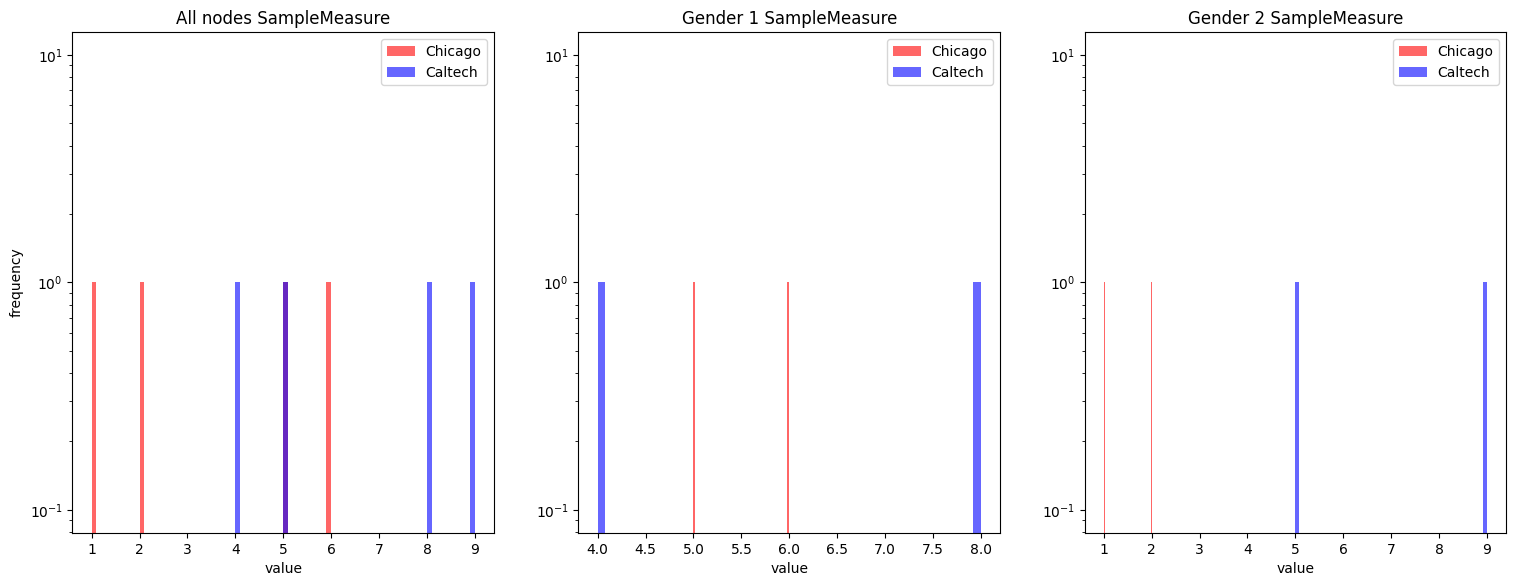

SampleMeasure mean and std:
	Chicago:
		All = 3.500 (+- 2.0616)
		Gender 1 = 5.500 (+- 0.5000)
		Gender 2 = 1.500 (+- 0.5000)
	Caltech:
		All = 6.500 (+- 2.0616)
		Gender 1 = 6.000 (+- 2.0000)
		Gender 2 = 7.000 (+- 2.0000)



In [2]:
def compare_nodes_centrality(centrality_name, chi_measure, chi_gender, cal_measure, cal_gender):
    """
    Show information about centrality measure
    :centrality_name (string): the title of the plot i.e.: PageRank, Degree Centrality, ...
    :chi_measure (dict): Chicago nodes centrality measures. keys are nodes, values are centrality measure
    :chi_gender (list): Gender of Chicago nodes -- chicago_gender array
    :cal_measure (dict): Caltech nodes centrality measures. keys are nodes, values are centrality measure
    :cal_gender (list): Gender of Caltech nodes -- caltech_gender array
    """


    plt.clf()
    fig, axs = plt.subplots(1, 3)

    chi_all = list(chi_measure.values())
    cal_all = list(cal_measure.values())
    axs[0].hist(chi_all, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[0].hist(cal_all, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('value')
    axs[0].set_ylabel('frequency')
    axs[0].legend(loc='upper right')
    axs[0].set_title("All nodes " + centrality_name)

    chi_gen_1 = [val for key, val in chi_measure.items() if key in np.where(chi_gender == 1)[0]]
    cal_gen_1 = [val for key, val in cal_measure.items() if key in np.where(cal_gender == 1)[0]]
    axs[1].hist(chi_gen_1, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[1].hist(cal_gen_1, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('value')
    axs[1].legend(loc='upper right')
    axs[1].set_title("Gender 1 " + centrality_name)

    chi_gen_2 = [val for key, val in chi_measure.items() if key in np.where(chi_gender == 2)[0]]
    cal_gen_2 = [val for key, val in cal_measure.items() if key in np.where(cal_gender == 2)[0]]
    axs[2].hist(chi_gen_2, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[2].hist(cal_gen_2, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[2].set_yscale('log')
    axs[2].set_xlabel('value')
    axs[2].legend(loc='upper right')
    axs[2].set_title("Gender 2 " + centrality_name)

    fig.set_size_inches(18.5, 6.5)
    plt.show()

    print("{} mean and std:".format(centrality_name))

    print("\tChicago:")
    print("\t\tAll = {0:.3f} (+- {1:.4f})".format(np.mean(chi_all), np.std(chi_all)))
    print("\t\tGender 1 = {0:.3f} (+- {1:.4f})".format(np.mean(chi_gen_1), np.std(chi_gen_1)))
    print("\t\tGender 2 = {0:.3f} (+- {1:.4f})".format(np.mean(chi_gen_2), np.std(chi_gen_2)))

    print("\tCaltech:")
    print("\t\tAll = {0:.3f} (+- {1:.4f})".format(np.mean(cal_all), np.std(cal_all)))
    print("\t\tGender 1 = {0:.3f} (+- {1:.4f})".format(np.mean(cal_gen_1), np.std(cal_gen_1)))
    print("\t\tGender 2 = {0:.3f} (+- {1:.4f})".format(np.mean(cal_gen_2), np.std(cal_gen_2)))

    print ("")



# This is a toy test to help you better understand what this function does.
chi_measure = {
    0: 5,
    1: 6,
    2: 1,
    3: 2
}
chi_gender = np.array([1, 1, 2, 2])

cal_measure = {
    0: 8,
    1: 4,
    2: 9,
    3: 5
}
cal_gender = np.array([1, 1, 2, 2])
compare_nodes_centrality('SampleMeasure', chi_measure, chi_gender, cal_measure, cal_gender)

In [3]:
import networkx as nx

# create the networkx objects for the two graphs
G_chicago = nx.from_scipy_sparse_array(chicago_adj)
G_caltech = nx.from_scipy_sparse_array(caltech_adj)

<Figure size 640x480 with 0 Axes>

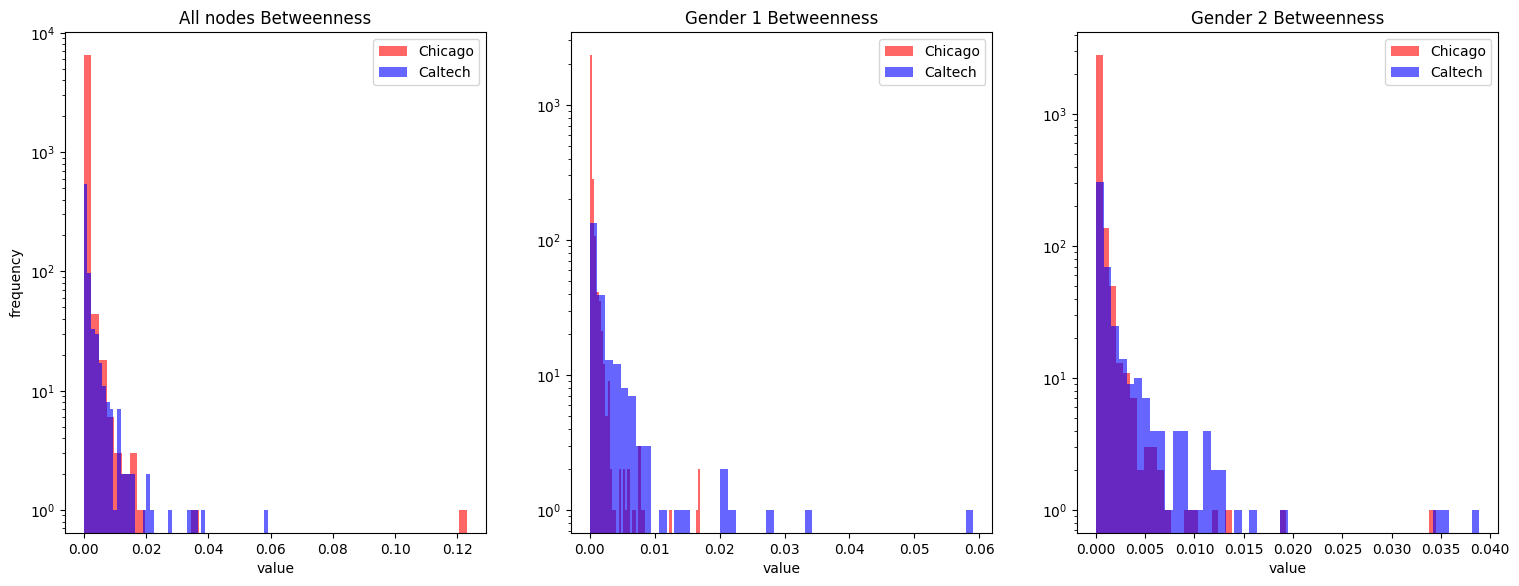

Betweenness mean and std:
	Chicago:
		All = 0.000 (+- 0.0018)
		Gender 1 = 0.000 (+- 0.0008)
		Gender 2 = 0.000 (+- 0.0010)
	Caltech:
		All = 0.002 (+- 0.0044)
		Gender 1 = 0.002 (+- 0.0057)
		Gender 2 = 0.002 (+- 0.0038)



In [4]:
# compute the betweenness centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_betweenness = nx.betweenness_centrality(G_chicago,k=50,normalized=True)
cal_betweenesss = nx.betweenness_centrality(G_caltech,k=50,normalized=True)

compare_nodes_centrality('Betweenness', chi_betweenness, chicago_gender, cal_betweenesss, caltech_gender)

<Figure size 640x480 with 0 Axes>

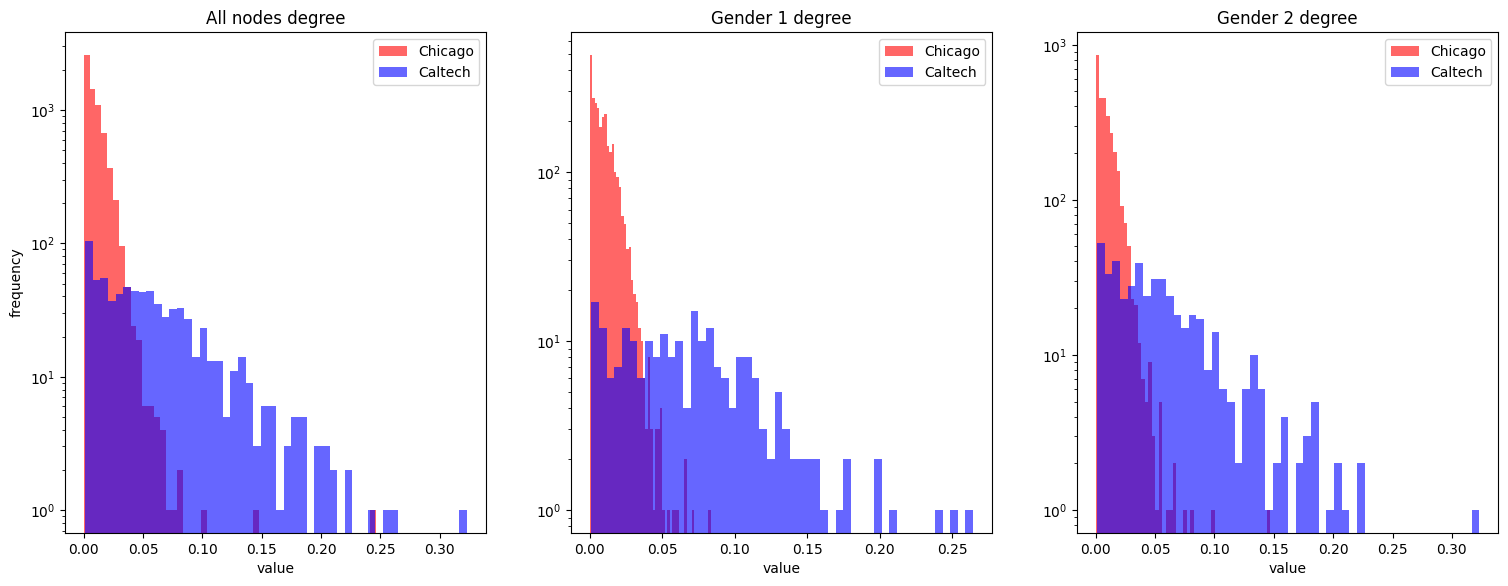

degree mean and std:
	Chicago:
		All = 0.010 (+- 0.0097)
		Gender 1 = 0.010 (+- 0.0092)
		Gender 2 = 0.010 (+- 0.0094)
	Caltech:
		All = 0.056 (+- 0.0482)
		Gender 1 = 0.068 (+- 0.0492)
		Gender 2 = 0.055 (+- 0.0466)



In [5]:
# compute the degreee centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_degree = nx.degree_centrality(G_chicago)
cal_degree = nx.degree_centrality(G_caltech)

compare_nodes_centrality('degree', chi_degree, chicago_gender, cal_degree, caltech_gender)

<Figure size 640x480 with 0 Axes>

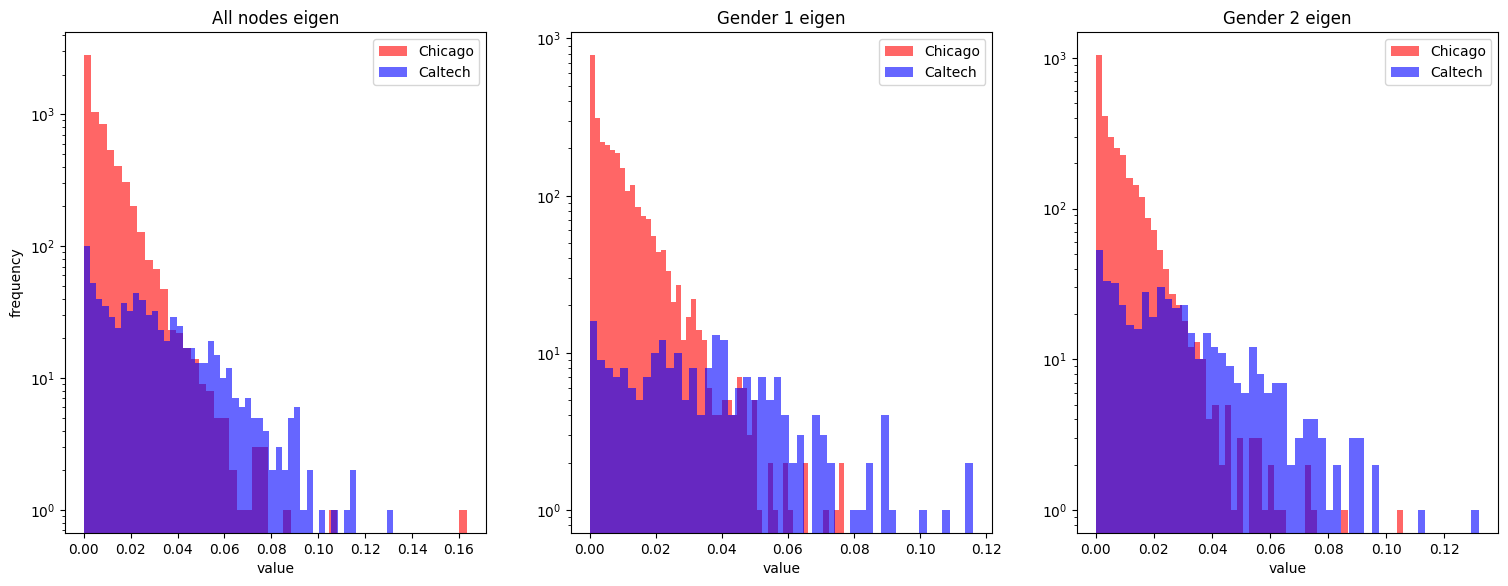

eigen mean and std:
	Chicago:
		All = 0.008 (+- 0.0096)
		Gender 1 = 0.008 (+- 0.0097)
		Gender 2 = 0.008 (+- 0.0092)
	Caltech:
		All = 0.027 (+- 0.0234)
		Gender 1 = 0.034 (+- 0.0242)
		Gender 2 = 0.027 (+- 0.0224)



In [6]:
# compute the eigenvector centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_eigen = nx.eigenvector_centrality(G_chicago)
cal_eigen = nx.eigenvector_centrality(G_caltech)

compare_nodes_centrality('eigen', chi_eigen, chicago_gender, cal_eigen, caltech_gender)

### Which university has more gender gap in terms of centrality? Which centrality score(s) show(s) such gender gap?  Give your insights on why this university has higher gender gap on the centrality score(s). 4pts

#### <font color="red">Please type your response here.</font>
The University which shows more gender gap in terms of centrality is Caltech than Chicago. <br><br>
Both degree centrality score and Eigen centrality score show this gender gap in Caltech university.
This can be due to difference in the fields of study, as Caltech is more focused on engineering and techical research, which traditionally has had lower female participation rates. Also, social norms and biases might also influence the involvement and engagement of female students in the university community, which could impact their centrality scores.
#### ***************

### Analyze the correlation between different centrality scores

In [7]:
# find the Spearman's rank correlation among the four centrality scores on Chicago
# TODO. 3pts
from scipy import stats

corr_pagerank_betweeness_chi,_ = stats.spearmanr(list(nx.pagerank(G_chicago,alpha=0.9).values()),list(chi_betweenness.values()))
corr_pagerank_degree_chi,_ = stats.spearmanr(list(nx.pagerank(G_chicago,alpha=0.9).values()),list(chi_degree.values()))
corr_pagerank_eigen_chi,_ = stats.spearmanr(list(nx.pagerank(G_chicago,alpha=0.9).values()),list(chi_eigen.values()))
corr_betweenness_degree_chi,_ = stats.spearmanr(list(chi_betweenness.values()),list(chi_degree.values()))
corr_betweeness_eigen_chi,_ = stats.spearmanr(list(chi_betweenness.values()),list(chi_eigen.values()))
corr_degree_eigen_chi,_ = stats.spearmanr(list(chi_degree.values()),list(chi_eigen.values()))

print(f'pagerank and betweeness: {corr_pagerank_betweeness_chi:3f}')
print(f'pagerank and degree: {corr_pagerank_degree_chi:3f}')
print(f'pagerank and eigen: {corr_pagerank_eigen_chi:3f}')
print(f'betweeness and degree: {corr_betweenness_degree_chi:3f}')
print(f'betweeness and eigen: {corr_betweeness_eigen_chi:3f}')
print(f'degree and eigen: {corr_degree_eigen_chi:3f}')

pagerank and betweeness: 0.848048
pagerank and degree: 0.968828
pagerank and eigen: 0.873593
betweeness and degree: 0.816614
betweeness and eigen: 0.725110
degree and eigen: 0.947239


In [8]:
# find the Spearman's rank correlation among the four centrality scores on Caltech
# TODO. 3pts

corr_pagerank_betweeness_cal,_ = stats.spearmanr(list(nx.pagerank(G_caltech,alpha=0.9).values()),list(cal_betweenesss.values()))
corr_pagerank_degree_cal,_ = stats.spearmanr(list(nx.pagerank(G_caltech,alpha=0.9).values()),list(cal_degree.values()))
corr_pagerank_eigen_cal,_ = stats.spearmanr(list(nx.pagerank(G_caltech,alpha=0.9).values()),list(cal_eigen.values()))
corr_betweenness_degree_cal,_ = stats.spearmanr(list(cal_betweenesss.values()),list(cal_degree.values()))
corr_betweeness_eigen_cal,_ = stats.spearmanr(list(cal_betweenesss.values()),list(cal_eigen.values()))
corr_degree_eigen_cal,_ = stats.spearmanr(list(cal_degree.values()),list(cal_eigen.values()))


print(f'pagerank and betweeness: {corr_pagerank_betweeness_cal:3f}')
print(f'pagerank and degree: {corr_pagerank_degree_cal:3f}')
print(f'pagerank and eigen: {corr_pagerank_eigen_cal:3f}')
print(f'betweeness and degree: {corr_betweenness_degree_cal:3f}')
print(f'betweeness and eigen: {corr_betweeness_eigen_cal:3f}')
print(f'degree and eigen: {corr_degree_eigen_cal:3f}')

pagerank and betweeness: 0.880688
pagerank and degree: 0.978498
pagerank and eigen: 0.952329
betweeness and degree: 0.870905
betweeness and eigen: 0.824741
degree and eigen: 0.985805


### For Chicago and Caltech respecitively, which centrality score pair has the most correlation? Give your insights on why the two scores in this pair have the most correlation. 4pts.

#### <font color="red">Please type your response here.</font>
In the Chicago network, Pagerank and Degree show the strongest relationship, with a correlation of 0.968828. This means that nodes with many connections (high degree) also tend to have high Pagerank scores, and vice versa. Pagerank considers both the number of incoming links and their quality, while Degree only looks at the number of links. So, it's not surprising that nodes with lots of connections also tend to be important according to Pagerank. <br><br>

In the Caltech network, the highest correlation occurs between Degree and Eigen, with a correlation of 0.985805. This indicates that nodes with many connections (high degree) also tend to have high eigenvector centrality scores, and vice versa. Eigenvector centrality considers not just the number of connections, but also the importance of those connections. So, nodes connected to other highly important nodes are likely to have high eigenvector centrality scores, as well as a high degree.
#### ***************

### Compare the four centrality score measures to Clustering Coefficient

In [9]:
# compute the correlation between each centrality score and clustering coefficient on Chicago
# TODO. 3pts

clustering_coeff_chi = nx.clustering(G_chicago)
corr_pagerank_cluster_chi,_ = stats.spearmanr(list(nx.pagerank(G_chicago,alpha=0.9).values()),list(clustering_coeff_chi.values()))
corr_betweeness_cluster_chi,_ = stats.spearmanr(list(chi_betweenness.values()),list(clustering_coeff_chi.values()))
corr_degree_cluster_chi,_ = stats.spearmanr(list(chi_degree.values()),list(clustering_coeff_chi.values()))
corr_eigen_cluster_chi,_ = stats.spearmanr(list(chi_eigen.values()),list(clustering_coeff_chi.values()))


print(f'pagerank and clustering: {corr_pagerank_cluster_chi:.3f}')
print(f'betweeness and clustering: {corr_betweeness_cluster_chi:.3f}')
print(f'degree and clustering: {corr_degree_cluster_chi:.3f}')
print(f'eigen and clustering: {corr_eigen_cluster_chi:.3f}')

pagerank and clustering: -0.343
betweeness and clustering: -0.389
degree and clustering: -0.287
eigen and clustering: -0.208


In [10]:
# compute the correlation between each centrality score and clustering coefficient on Caltech
# TODO. 3pts

clustering_coeff_cal = nx.clustering(G_caltech)
corr_pagerank_cluster_cal,_ = stats.spearmanr(list(nx.pagerank(G_caltech,alpha=0.9).values()),list(clustering_coeff_cal.values()))
corr_betweeness_cluster_cal,_ = stats.spearmanr(list(cal_betweenesss.values()),list(clustering_coeff_cal.values()))
corr_degree_cluster_cal,_ = stats.spearmanr(list(cal_degree.values()),list(clustering_coeff_cal.values()))
corr_eigen_cluster_cal,_ = stats.spearmanr(list(cal_eigen.values()),list(clustering_coeff_cal.values()))


print(f'pagerank and clustering: {corr_pagerank_cluster_cal:.3f}')
print(f'betweeness and clustering: {corr_betweeness_cluster_cal:.3f}')
print(f'degree and clustering: {corr_degree_cluster_cal:.3f}')
print(f'eigen and clustering: {corr_eigen_cluster_cal:.3f}')

pagerank and clustering: -0.418
betweeness and clustering: -0.504
degree and clustering: -0.373
eigen and clustering: -0.329


### For Chicago and Caltech respecitively, among the four centrality scores, which one has the least correlation with the clustering coefficient? Please give your insights. 4pts

#### <font color="red">Please type your response here.</font>
In both Chicago and Caltech, betweeness and clustering scores give us the least correlation with clustering coefficient among the four centrality scores,. <br>
This could be because betweeness does not take the whole network into consideration but only the shortest path between the nodes, so using betweeness with clustering coefficient would not provide us the best results compared to other centrality scores with clustering coefficient.
#### ***************

## Analysis of Link Prediction
### Conduct link prediction on Caltech

In [11]:
edges = list(G_caltech.edges)

# note that G_caltech is an undirected graph
# if there is an edge between node a and b,
# the edge list will only contain (a, b) or (b, a) to save space, where a<=b or b<=a respectively
edges[:10]

[(0, 4),
 (0, 30),
 (0, 35),
 (0, 38),
 (0, 42),
 (0, 60),
 (0, 62),
 (0, 89),
 (0, 95),
 (0, 100)]

In [12]:
# from edges, sample 75% training edges and 25% test edges
# both edges_train and edges_test should be a list of edges
# TODO. 2pts.
edges_train = edges[:int(.75*len(edges))]
edges_test = edges[int(.75*len(edges)):]


print(len(edges_train))
print(len(edges_test))

# construct a training Graph based on training edges
G_train = nx.from_edgelist(edges_train)
G_train.add_nodes_from(G_caltech.nodes)
print(G_train)

12492
4164
Graph with 769 nodes and 12492 edges


In [13]:
# we want the algorithm to score all the possible edges except those in the training set
G_complete = nx.complete_graph(G_caltech.number_of_nodes())
edges_complete = list(G_complete.edges)
edges_to_score = list(set(edges_complete) - set(edges_train))
print(len(edges_to_score))

282804


282804


(array([2.30662e+05, 3.04470e+04, 1.09070e+04, 5.13700e+03, 2.56900e+03,
        1.37000e+03, 7.71000e+02, 3.94000e+02, 2.49000e+02, 1.20000e+02,
        9.50000e+01, 3.40000e+01, 1.70000e+01, 1.40000e+01, 5.00000e+00,
        5.00000e+00, 5.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.        ,  0.83505887,  1.67011775,  2.50517662,  3.34023549,
         4.17529436,  5.01035324,  5.84541211,  6.68047098,  7.51552985,
         8.35058873,  9.1856476 , 10.02070647, 10.85576534, 11.69082422,
        12.52588309, 13.36094196, 14.19600083, 15.03105971, 15.86611858,
        16.70117745]),
 <BarContainer object of 20 artists>)

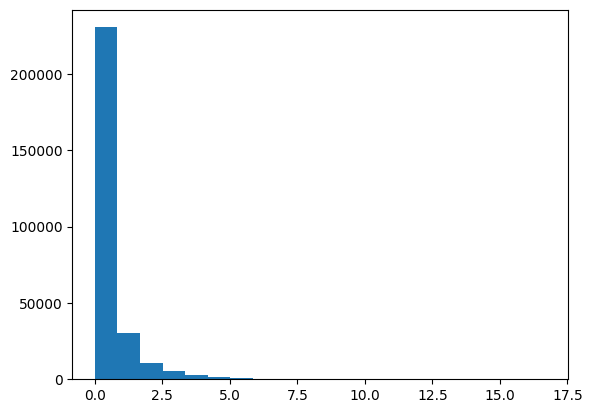

In [14]:
# link prediction using Adamic-Adar index
# you need to score every edge in edges_to_score
# edge_score_ada should be a dictionary {(u, v): score}
# TODO. 3pts

import collections

ada = nx.adamic_adar_index(G_train,edges_to_score)
edge_score_ada = dict()
for u,v,score in ada:
    edge_score_ada[u,v] = score

print(len(edge_score_ada))


# plot a histogram of all the scores in edge_score_ada
# TODO. 2pts
plt.hist(list(edge_score_ada.values()), bins=20)

282804


(array([2.29149e+05, 3.62700e+04, 1.05270e+04, 3.49500e+03, 1.67000e+03,
        8.58000e+02, 4.00000e+02, 2.09000e+02, 1.14000e+02, 4.10000e+01,
        4.60000e+01, 1.10000e+01, 3.00000e+00, 4.00000e+00, 3.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

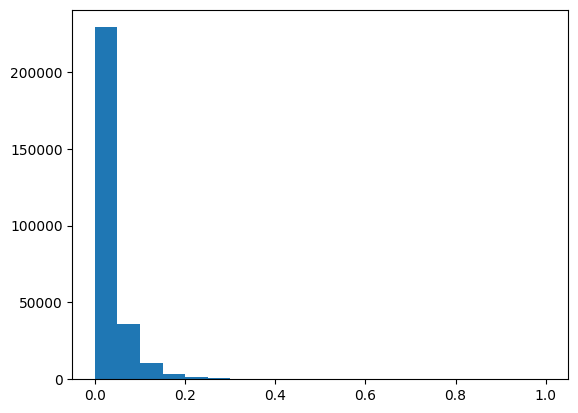

In [15]:
# link prediction using Jaccard Coefficient
# you need to score every edge in edges_to_score
# edge_score_jac should be a dictionary {(u, v): score}
# TODO. 3pts.
jaccard_coeff = nx.jaccard_coefficient(G_train,edges_to_score)
edge_score_jac = dict()
for u,v,score in jaccard_coeff:
    edge_score_jac[u,v] = score


print(len(edge_score_jac))

# plot a histogram of all the scores in edge_score_jac
# TODO. 2pts
plt.hist(list(edge_score_jac.values()), bins=20)

In [16]:
# the link prediction evaluation of the entire graph is based on that of each node
# we only evaluate nodes that have a degree >= 20 and have gender label 1 or 2
from collections import Counter
deg = Counter(list(sum(edges_to_score, ())))
nodes_to_eval = [k for k, v in deg.items() if v >= 20]
nodes_to_eval = [node for node in nodes_to_eval if caltech_gender[node] != 0]

from collections import Counter
print(f'Gender count in nodes_to_eval: {Counter(caltech_gender[nodes_to_eval])}')

Gender count in nodes_to_eval: Counter({2: 475, 1: 228})


In [17]:
def eval_link_prediction(nodes_to_eval, edge_score, gender, edges_test, k):
    """
    :nodes_to_eval (list): a list of nodes to evaluate
    :edge_score (dict): the predicted scores for edges in edges_to_score
    :gender (list): the gender list for all nodes in the graph
    :edges_test (list): the edge list of the test edges
    :k (int): the k in precision@k
    Return the average precision on nodes, the average precision for gender1 nodes,
    and the average precision for gender2 nodes.

    Hint:
    For each node in nodes_to_eval,
    retrieve the top-k incident edges on this node ranked by the predicted scores given in edge_score.
    Count how many retrieved edges are actually in edges_test.
    In this way, we can obtain the precision of predicted links for this node.
    Compute the precisions for all nodes in nodes_to_eval, return the avearge precision.
    Similarly, compute the average precision for only nodes with gender1/gender2 in nodes_to_eval.

    """
    #TODO. 10pts.
    precision = 0
    precision_gender1 = 0
    precision_gender2 = 0

    # Loop through all nodes in nodes_to_eval
    for node in nodes_to_eval:

        # Get the top-k incident edges on this node ranked by the predicted scores
        incident_edges = [(x[0], x[1]) for x in edge_score.items() if x[0][0] == node or x[0][1] == node]
        sorted_edges = sorted(incident_edges, key=lambda x: x[1], reverse=True)[:k]
        sorted_edges = list(map(lambda x:x[0],sorted_edges))
        # Count how many of the retrieved edges are in edges_test
        num_correct = sum([1 for edge in sorted_edges if edge in edges_test])
        # Compute precision for this node and add it to the running total
        precision += num_correct / k
        # Compute precision for this node if the node is of gender 1 or 2, and add it to the running total
        if gender[node] == 1:
            precision_gender1 += num_correct / k
        elif gender[node] == 2:
            precision_gender2 += num_correct / k

    # Compute the final precisions by dividing by the number of nodes for each gender

    num_gender1 = list(gender).count(1)
    num_gender2 = list(gender).count(2)
    precision /= len(nodes_to_eval)
    precision_gender1 /= num_gender1
    precision_gender2 /= num_gender2

    return precision, precision_gender1, precision_gender2


# a test case
# this test graph has six nodes [0, 1, 2, 3, 4, 5]
nodes_to_eval_example = [0,1,2,4]
edge_score_example = {(0, 1): 0.27, (0, 2): 0.39, (0, 3): 0.32,
                      (1, 2): 0.3, (1, 4): 0.7,  (1, 5): 0.67,
                      (2, 4): 0.45, (2, 5): 0.58, (4, 5): 0.9}
gender_example = [2,1,1,2,2,1]
edges_test_example = [(0, 3), (1,4), (1, 5), (2, 3), (2, 5), (3, 4)]
print(eval_link_prediction(nodes_to_eval_example, edge_score_example, gender_example, edges_test_example, 1))
print(eval_link_prediction(nodes_to_eval_example, edge_score_example, gender_example, edges_test_example, 2))

(0.5, 0.6666666666666666, 0.0)
(0.625, 0.5, 0.3333333333333333)


In [18]:
for algo in ['adamic-adar', 'jaccard']:
    print(f'Evaluating link prediction on {algo}')
    for k in [5, 10, 20]:
        edge_score = edge_score_ada if algo == 'adamic-adar' else edge_score_jac
        precision, precision_gender1, precision_gender2 = eval_link_prediction(nodes_to_eval,
                                                                              edge_score,
                                                                              caltech_gender,
                                                                              edges_test,
                                                                              k)
        print(f'precision@{k}: {precision:.3f}, precision@{k} for gender1: {precision_gender1: .3f}, precision@{k} for gender2: {precision_gender2:.3f}, precision@{k} diff: {precision_gender1-precision_gender2: .3f}')
    print()

Evaluating link prediction on adamic-adar
precision@5: 0.290, precision@5 for gender1:  0.332, precision@5 for gender2: 0.270, precision@5 diff:  0.062
precision@10: 0.256, precision@10 for gender1:  0.300, precision@10 for gender2: 0.236, precision@10 diff:  0.064
precision@20: 0.209, precision@20 for gender1:  0.247, precision@20 for gender2: 0.191, precision@20 diff:  0.056

Evaluating link prediction on jaccard
precision@5: 0.280, precision@5 for gender1:  0.325, precision@5 for gender2: 0.259, precision@5 diff:  0.066
precision@10: 0.254, precision@10 for gender1:  0.301, precision@10 for gender2: 0.232, precision@10 diff:  0.069
precision@20: 0.218, precision@20 for gender1:  0.264, precision@20 for gender2: 0.195, precision@20 diff:  0.068



### 1) On which gender the algorithms give better precision?  Give your insights on that. 3pts.

### 2) Which algorithm is more fair (lower precision gap)? Please give your insights on that. (Hint: Understand how the two algorithms work, and refer to the calculated centrality scores on Caltech. However, you don't have to follow this hint to explain). 5pts.

#### <font color="red">Please type your response here.</font>

1) When we compare the precision scores for both genders, we notice that both algorithms exhibit superior performance for gender1. Across precision@5, precision@10, and precision@20 metrics, the precision scores consistently show improvement for gender1 in comparison to gender2. This suggests that the algorithms demonstrate higher accuracy in predicting connections among nodes belonging to gender1 as opposed to gender2. <br> <br>
2) To determine which algorithm is more equitable, we need to examine the precision gap between gender1 and gender2 for each algorithm. This gap is found by calculating the absolute difference between the precision scores of the two genders. Upon analysis, it is clear that the adamic-adar algorithm exhibits a smaller precision gap compared to the jaccard algorithm. This suggests that the adamic-adar algorithm is less biased than the jaccard algorithm in predicting links between nodes of different genders.

The adamic-adar algorithm operates on the concept that two nodes are more likely to be connected if they share many common neighbors with low degrees. Conversely, the jaccard algorithm computes the similarity between two nodes based on the proportion of shared neighbors to the total number of neighbors. It's essential to note that the centrality scores on Caltech do not directly influence the performance of these algorithms. While centrality scores indicate the relative importance of nodes within a network, the algorithms are primarily focused on forecasting links between nodes.
#### ***************